## **1. Introduction**
---
 
**Dataset**    : E-Commerce Shipping Data  
**Objective**   : This dataset discusses E-Commerce Shipping Data. Where this data discusses how the process of shipping different data, where there are land routes, sea routes, and air routes. From these three things, it will also be seen how the rating of each path process is, and the main purpose of making this model is to find out whether from these column parameters, the delivery is on time or not.



## **2. Import Libraries**
---

In [22]:
import pandas as pd
from numpy import mean, median
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_score, f1_score
from sklearn.compose import make_column_transformer
from feature_engine.outliers import Winsorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from time import time
import warnings
import pickle
from sklearn.pipeline import Pipeline,make_pipeline
import plotly.express as px


## **3. Data Loading**
---

***Data Contains :***
- ***ID***                    : ID Number of Customers.
- ***Warehouse block***       : The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- ***Mode of shipment***      : The Company Ships the products in multiple way such as Ship, Flight and Road.
- ***Customer care calls***   : The number of calls made from enquiry for enquiry of the shipment.
- ***Customer rating***       : The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- ***Cost of the product***   : Cost of the Product in US Dollars.
- ***Prior purchases***       : The Number of Prior Purchase.
- ***Product importance***   : The company has categorized the product in the various parameter such as low, medium, high.
Gender                  : Male and Female.
- ***Discount offered***      : Discount offered on that specific product.
- ***Weight in gms***         : It is the weight in grams.
- ***Reached on time***       : It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.*

***Loading Data:***
> Pada proses ini akan melakukan loading data menggunakan fungsi dari pandas. Dimana yang akan dilakukan adalah untuk melakukan read_csv karena dataset memiliki format csv. 

In [26]:
# Loading Data
df = pd.read_csv('train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## **4. Exploratory Data Analysis (EDA)**

#### ***Data Exploration***
> Pada tahap ini akan dilakukan explorasi data. Explorasi data ini sangat berguna untuk lebih mengenal bagaimana distribusi atau penyebaran data yang akan dianalisa. Tahapan ini juga sangat membantu untuk melihat dari sisi bisnis. Untuk melakukan EDA (Exploratory Data Analysis) ini, akan dilakukan beberapa hal diantaranya adalah untuk melihat berapa total rows dan column data, informasi data yang diantaranya adalah mean, median, standard deviasi, skewness, dan sebagainya yang dapat menunjang analisa untuk kedepannya.

In [27]:
# Lowercases columns
''' 
tujuannya adalah untuk membuat lowercase pada seluruh nama column, hal ini untuk mempermudah dalam penulisan, karena akan dikhawatirkan jika data sangat case sensitive. 
'''
df.columns = df.columns.str.lower()

In [28]:
# Data Types and Missing Values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   warehouse_block      10999 non-null  object
 2   mode_of_shipment     10999 non-null  object
 3   customer_care_calls  10999 non-null  int64 
 4   customer_rating      10999 non-null  int64 
 5   cost_of_the_product  10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   gender               10999 non-null  object
 9   discount_offered     10999 non-null  int64 
 10  weight_in_gms        10999 non-null  int64 
 11  reached.on.time_y.n  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [29]:
# For Checking Total Missing Values 
df.isna().sum()

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
reached.on.time_y.n    0
dtype: int64

In [6]:
# Describe
''' 
tujuannya adalah untuk melihat informasi seperti count, mean, standard deviation, min, 25%, 50%, 75%, max.
'''
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
cost_of_the_product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
reached.on.time_y.n,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [30]:
# Selecting only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculating skewness only for numerical columns
skewness = numerical_df.skew()
print(skewness)

id                     0.000000
customer_care_calls    0.391926
customer_rating        0.004360
cost_of_the_product   -0.157117
prior_purchases        1.681897
discount_offered       1.798929
weight_in_gms         -0.249747
reached.on.time_y.n   -0.394257
dtype: float64


> Didapatkan bahwa pada saat melalakukan pengecheckan nilai skewness, column prior_purchases dan discount_offered didapatkan bahwa nilai skewness pada column tersebut mengalami skew, hal ini kemungkinan dikarenakan terdapat outliers pada kedua columns tersebut. Maka perlu dilakukan handling outliers. Pada kasus ini jika tidak ingin menghilangkan data, maka handling outliers yang paling cocok adalah dengan menggunakan winsorizer yang nanti akan dilakukan di proses selanjutnya.

#### ***Data Cleaning***
> Pada proses ini akan dilakukan data cleaning pada dataset yang tersedia. Dimana langkah-langkah yang akan dilakukan adalah change value name, dan dropping column. Penggantian value akan dilakukan pada column block_warehouse. Dimana pada value ini, value yang terdapat pada column ini terdiri atas 'A','B','C','D','F'. Hal ini tidak sesuai dengan urutan Alphabet, dimana seharunya setelah huruf 'D' adalah 'E', bukan 'F'. Maka perlu dilakukan penggantian value tersebut
>
> Lalu pada langkah selanjutnya adalah dropping column_id. Karena Column ID tidak terlalu dibutuhkan dalam pembuatan pemodelan. Maka columns ID perlu didrop

- Change Value Name
> Pada value block warehouse, didapatkan nama yang terdiri dari A,B,C,D,F. Berdasarkan dari urutan alphabet, urutan ini memiliki kesalahan, jadi akan dilakukan perubahan nama value F menjadi E

In [31]:
# Unique Value in Warehouse Block
df['warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [32]:
# Changing Value F into E
df['warehouse_block'] = df['warehouse_block'].replace('F', 'E')

In [33]:
# Value already changed
df['warehouse_block'].unique()

array(['D', 'E', 'A', 'B', 'C'], dtype=object)

> Value F sudah terganti sesuai dengan huruf 'E', dan sudah sesuai dengan urutan alphabet.

- Drop Column 'id'
> Dilakukan dropping column ID karena column ini tidak terlalu dibutuhkan untuk pemodelan

In [34]:
# Drop Column ID
df.drop(columns='id', inplace=True)

#### ***Data Visualization***
> Proses ini akan melakukan analisa secara visualisasi. Dimana pada analisa akan menggunakan beberapa metode visualisasi seperti boxplot, histogram, dan scatterplot. Tujuan dari visualisasi data ini adalah untuk memudahkan dan melihat lebih jelas persebaran ataupun korelasi antar data yang ada. Pada proses ini akan dilakukan beberapa analisa, diantaranya adalah :

*1. Heatmap Correlation*
> Kegunaan dari heatmap correlation ini adalah untuk melihat correlation secara keseluruhan. Hal ini dapat mempermudah analisa korelasi dari seluruh columns.

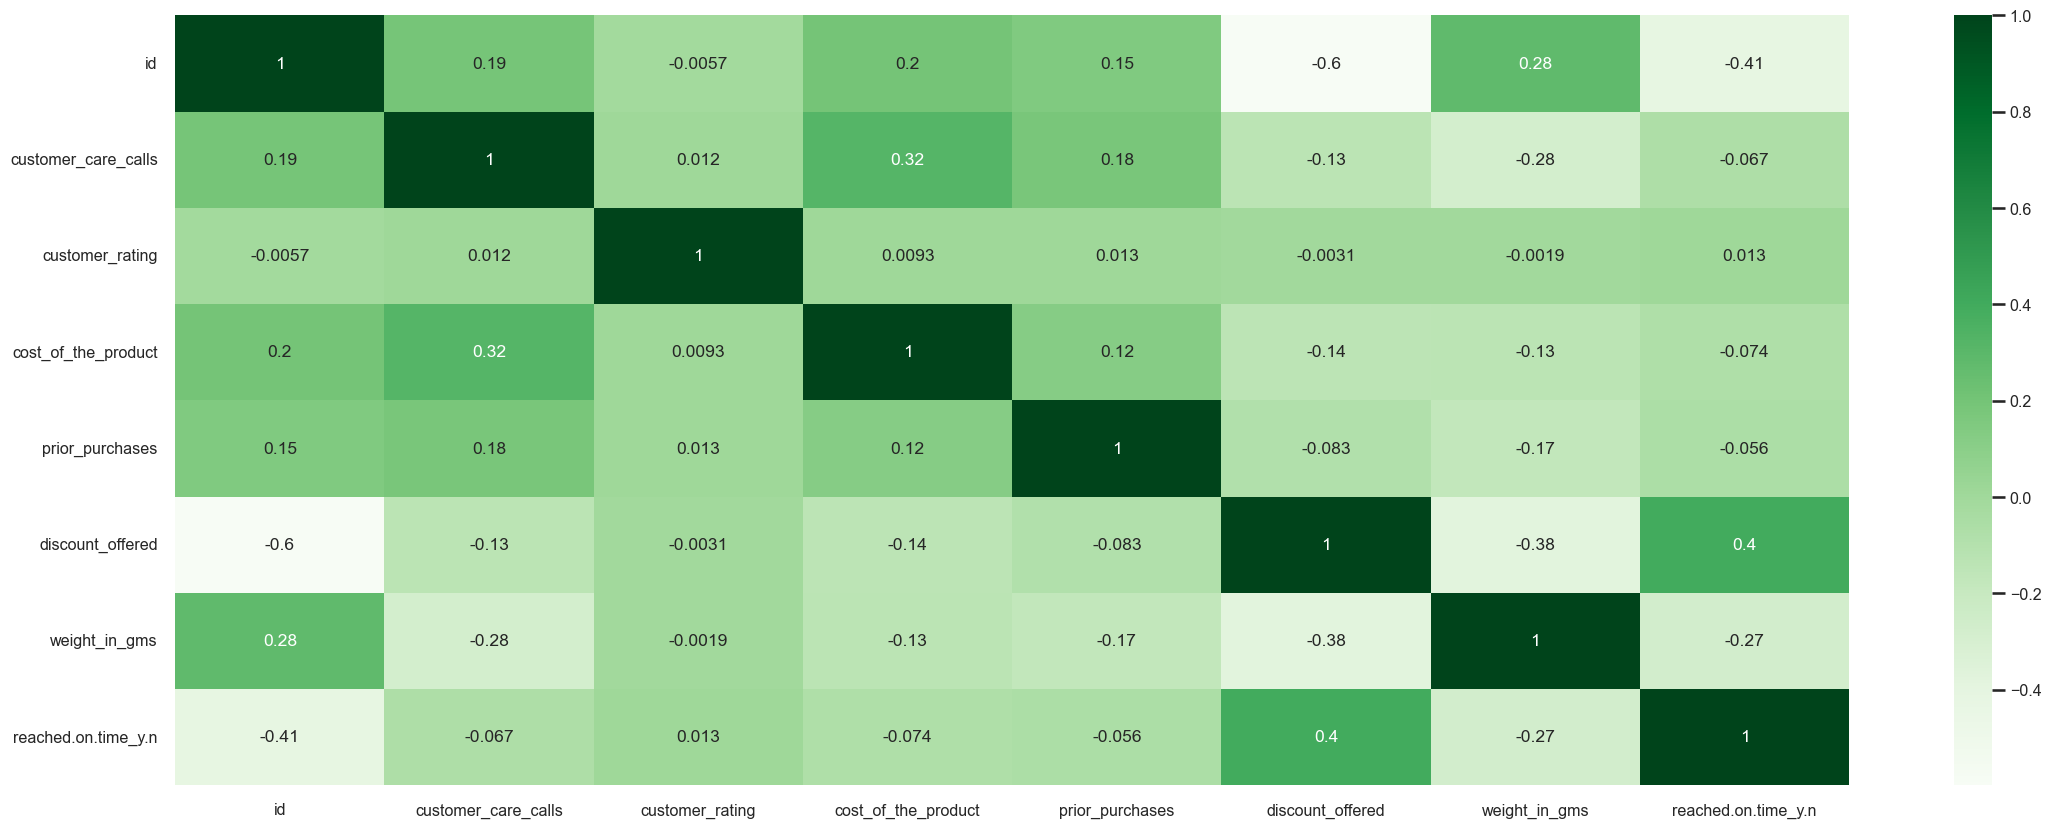

In [8]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

# Set the size and context of the seaborn plot
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)

# Create the heatmap using the correlation matrix of the numerical dataframe
sns.heatmap(numerical_df.corr(), cmap='Greens', annot=True)

# Show the plot
plt.show()

> Berdasarkan dari hasil ini dapat dikatakan ada beberapa column yang memiliki korelasi. Ada beberapa column yang memiliki korelasi sampai 30% - 40%, dan ada juga korelasi minus yang dapat dikatakan bahwa column tersebut tidak memiliki atau hampir tidak memiliki korelasi satu sama lain

*2. Distribution of Customer Rating*
> Proses ini akan melakukan visualisasi distribusi dari customer rating, dimana distribusi ini perseberannya berdasarkan dari frequency data customer_rating seluruh rows.

- Histogram Distribution

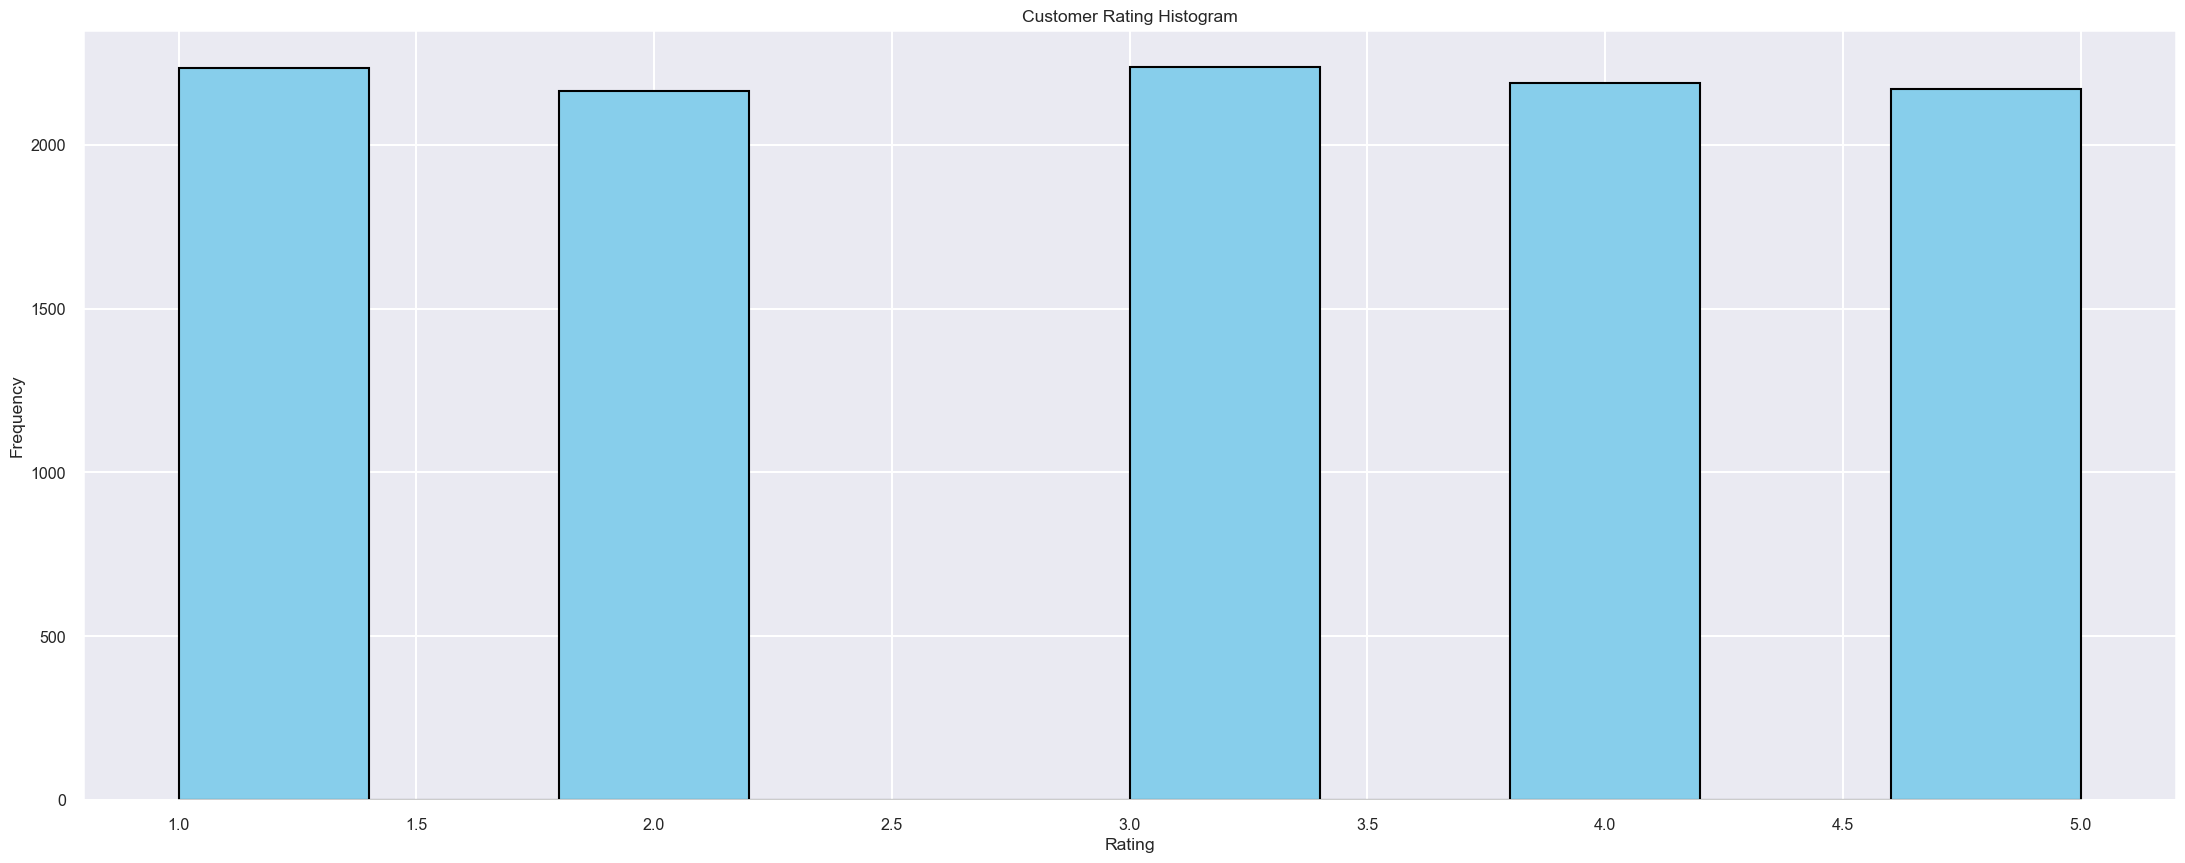

In [9]:
df['customer_rating'].hist(bins=10, color='skyblue', edgecolor='black')

plt.title('Customer Rating Histogram')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

> Berdasarkan dari hasil data histogram, didapatkan bahwa persebaran nilai customer rating memiliki persebaran yang relatif sama besar. Hal ini ada beberapa kemungkinan data ini terbagi rata untuk pada saat data entry. Dan jika dilihat secara detail, didapatkan nilai tertinggi persebaran/distribusinya adalah rating 1 dan rating 3. Besar kemungkinan pada proses shipping ini sering terjadi problem yang membuat customer tidak merasa puas dengan pelayanan shippingnya.

*3. Correlation between Gender and Customer Rating*
> Proses ini akan melakukan correlation antara gender dengan rating. Hal ini bertujuan untuk melihat kepuasaan pelanggan berdasarkan dari gender, yang didasari/terbagi berdasarkan dari gender.

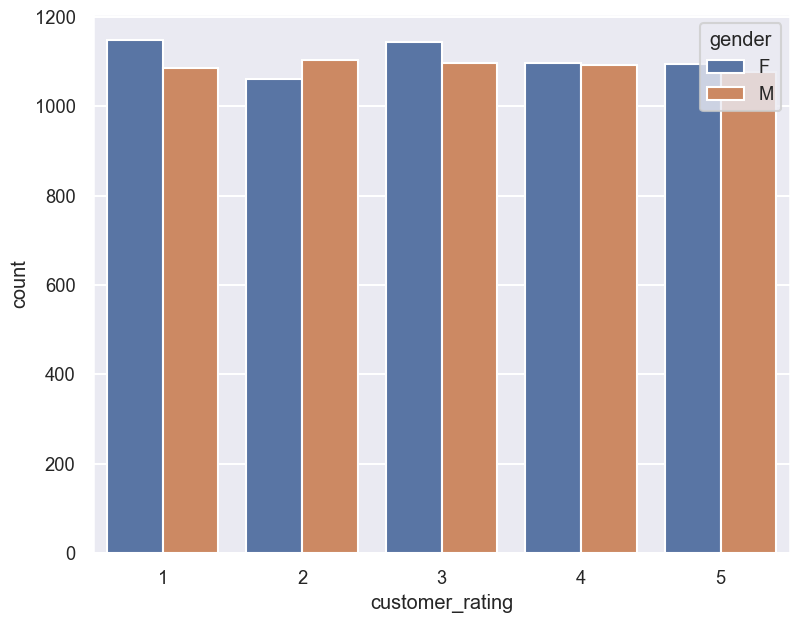

In [10]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='customer_rating', hue='gender', data=df)
plt.show()

> Didapatkan bahwa pengguna shipping ini lebih banyak perempuan, dibanding dengan laki-laki, Namun persebarannya hampir merata secara menyeluruh. Hal dapat dikatakan bahwa gender yang sering melakukan penilaian adalah gender wanita/female

*4. Distribution Cost of the Product*

- Histogram Distribution

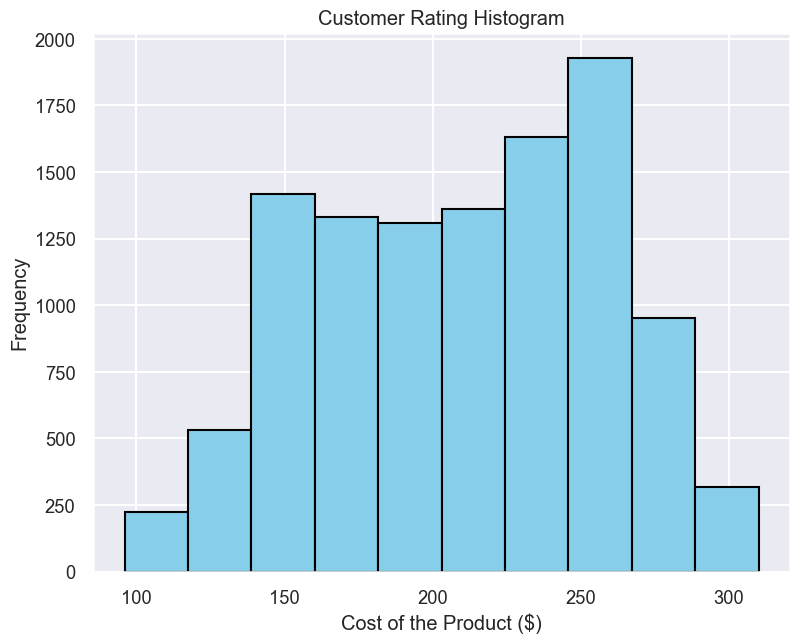

In [11]:
df['cost_of_the_product'].hist(bins=10, color='skyblue', edgecolor='black')

plt.title('Customer Rating Histogram')
plt.xlabel('Cost of the Product ($)')
plt.ylabel('Frequency')
plt.show()

- Boxplot

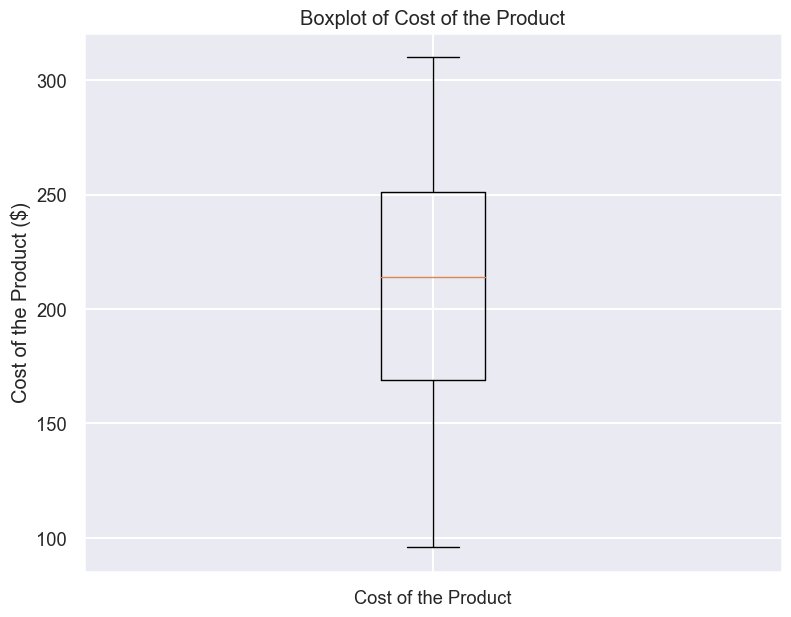

In [12]:
# Create a boxplot for the 'cost_of_the_product' column
plt.boxplot(df['cost_of_the_product'])  # Using dropna() to remove NaN values which can't be plotted

plt.title('Boxplot of Cost of the Product')
plt.ylabel('Cost of the Product ($)')
plt.xticks([1], ['Cost of the Product'])  # This sets the x-tick label to 'Cost of the Product'
plt.show()

> Berdasarkan dari hasil diatas didapatkan bahwa distribusi untuk cost of the product rata-rata berada dikisaran harga $250, hal ini dapat dikatakan bahwa besarnya biaya per product ini dapat dikarenakan biaya pengiriman yang mahal ataupun jarak tempuh pengiriman

*5. Correlation between Mode of Shipment and Cost of the Product*

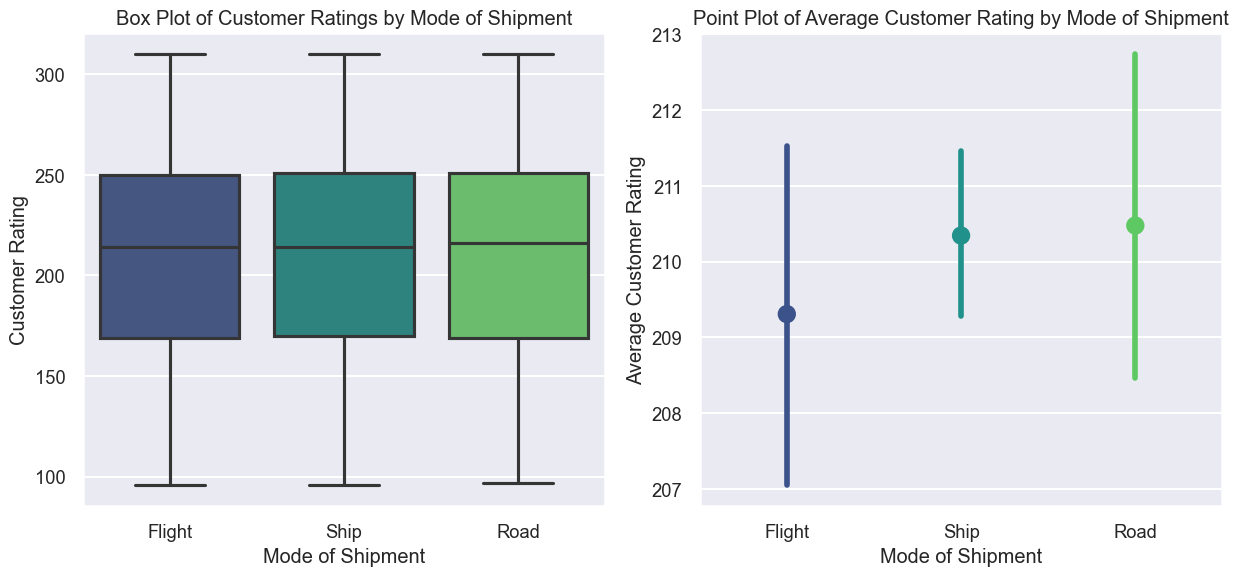

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x='mode_of_shipment', y='cost_of_the_product', data=df, palette='viridis')
plt.title('Box Plot of Customer Ratings by Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Customer Rating')

# Point Plot
plt.subplot(1, 3, 3)
sns.pointplot(x='mode_of_shipment', y='cost_of_the_product', data=df, join=False, palette='viridis')
plt.title('Point Plot of Average Customer Rating by Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Average Customer Rating')

# Show the plots
plt.tight_layout()
plt.show()

> Berdasarkan dari hasil dari analisa ini didapatkan bahwa boxplot memiliki persebaran mediannya tersebar secara merata, namun pada analisa point plot, dapat dilihat bahwa rata-rata pengiriman menggunakan jalur darat, dan tidak tidak jauh dari hasil pengiriman menggunakan kapal

*6. Correlation between Warehouse Block and Cost of the Product*

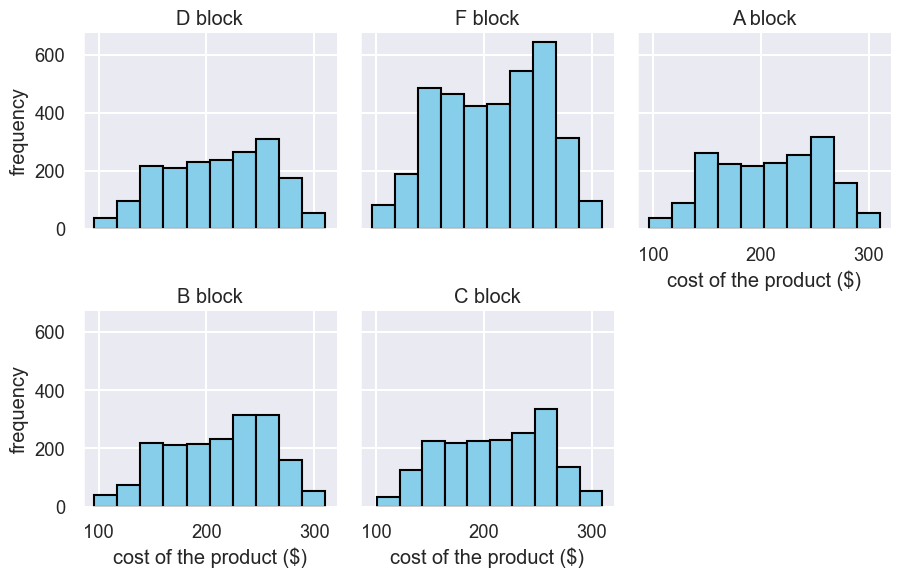

In [14]:
warnings.filterwarnings('ignore')
# You can plot a histogram for 'cost_of_the_product' for each category in 'warehouse_block'
g = sns.FacetGrid(df, col='warehouse_block', col_wrap=3, sharex=True, sharey=True)  # Adjust col_wrap as needed
g.map(plt.hist, 'cost_of_the_product', color='skyblue', edgecolor='black')

# Adding titles and labels
g.set_titles('{col_name} block')
g.set_xlabels('cost of the product ($)')
g.set_ylabels('frequency')

# Display the plots
plt.show()

> Berdasarkan dari hasil histogram pada tiap block, didapatkan bahwa proses shipping sering dilakukan pada block warehouse E. Hal ini dapat kemungkinan bahwa jarak pengiriman yang paling dekat dengan customer berada pada warehouse block.\E

*7. Correlation between Warehouse Block and Mode of Shipment*

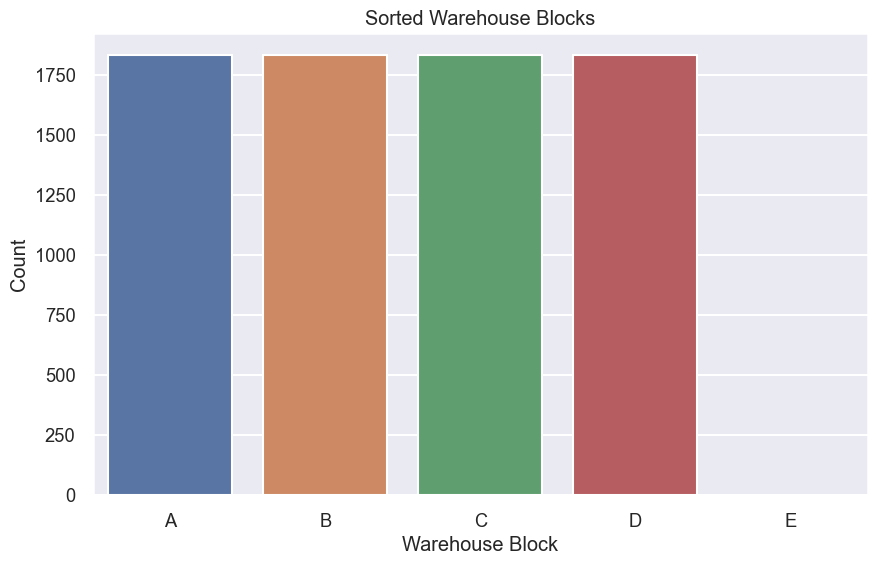

In [19]:
# Sort the 'warehouse_block' column in the desired order
sorted_order = ['A', 'B', 'C', 'D', 'E']
df['warehouse_block'] = pd.Categorical(df['warehouse_block'], categories=sorted_order, ordered=True)
data = df.sort_values('warehouse_block')

# Now plot the sorted data
plt.figure(figsize=(10, 6))
sns.countplot(x='warehouse_block', data=data, order=sorted_order)
plt.title('Sorted Warehouse Blocks')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.show()

In [21]:
df['mode_of_shipment'].value_counts()

mode_of_shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

In [22]:
df['warehouse_block'].value_counts()

warehouse_block
E    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

*8. Correlation between Mode of Shipment and Rating*

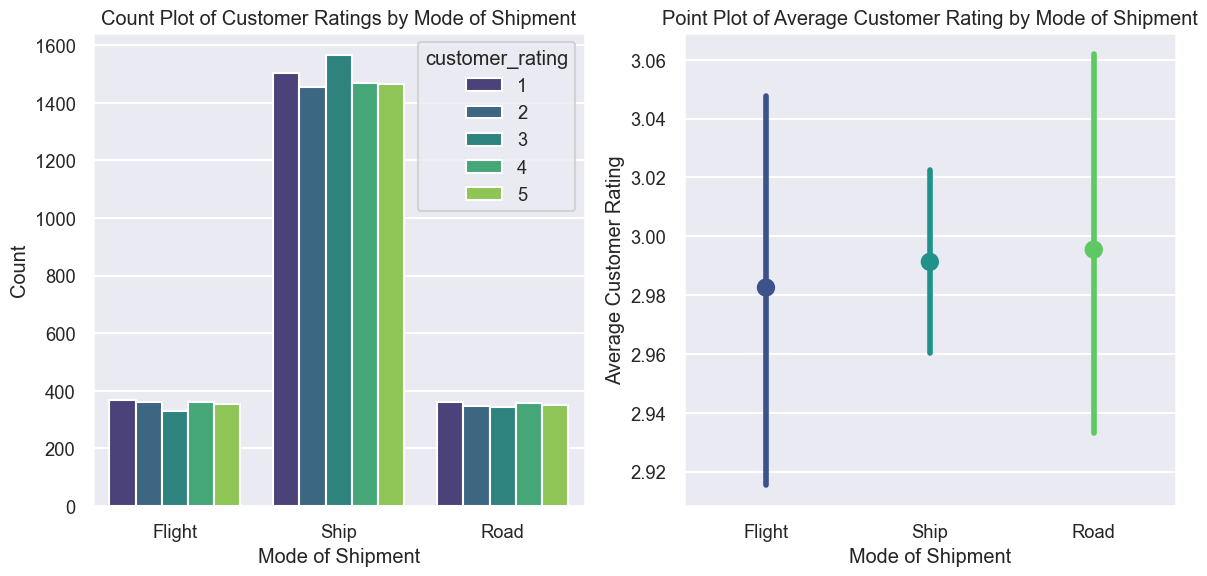

In [18]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Count Plot
plt.subplot(1, 3, 1)
sns.countplot(x='mode_of_shipment', hue='customer_rating', data=df, palette='viridis')
plt.title('Count Plot of Customer Ratings by Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')

# # Box Plot
# plt.subplot(1, 3, 2)
# sns.boxplot(x='mode_of_shipment', y='customer_rating', data=df, palette='viridis')
# plt.title('Box Plot of Customer Ratings by Mode of Shipment')
# plt.xlabel('Mode of Shipment')
# plt.ylabel('Customer Rating')

# Point Plot
plt.subplot(1, 3, 2)
sns.pointplot(x='mode_of_shipment', y='customer_rating', data=df, join=False, palette='viridis')
plt.title('Point Plot of Average Customer Rating by Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Average Customer Rating')

# Show the plots
plt.tight_layout()
plt.show()

> Berdasarkan dari hasil distribusi antara korelasi mode of shipment dan rating, didapatkan rating tertinggi didapatkan pada mode pengiriman dengan menggunakan kapal.

*8. Correlation between Mode of Shipment and On time Shipping*

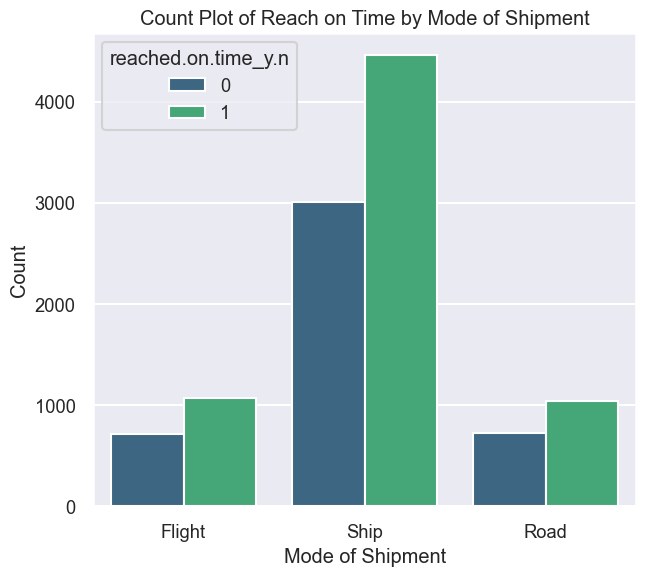

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Count Plot
plt.subplot(1, 3, 1)
sns.countplot(x='mode_of_shipment', hue='reached.on.time_y.n', data=df, palette='viridis')
plt.title('Count Plot of Reach on Time by Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

> Berdasarkan dari hasil analisa distribusi korelasi antara mode of shipment dengan customer rating, didapatkan bahwa pengiriman dengan rating terbaik rata-rata menggunakan pengiriman melalui kapal.

*9. Boxplot for Each Numerical Columns*

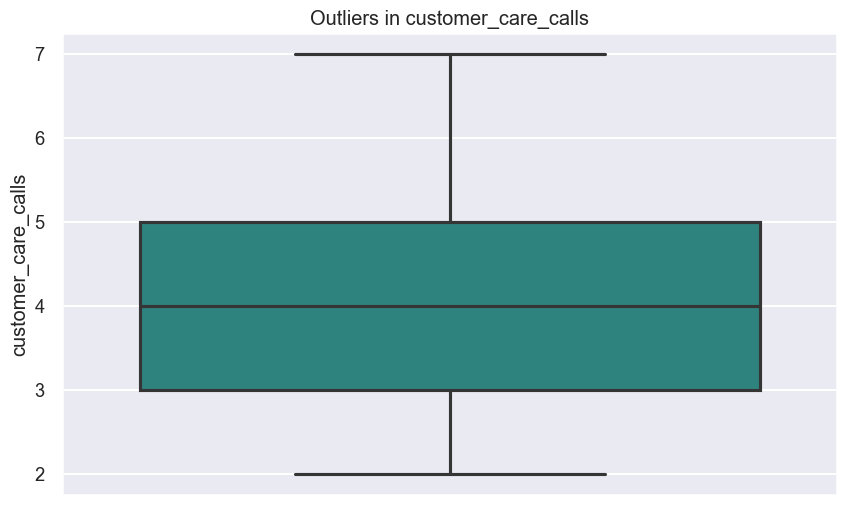

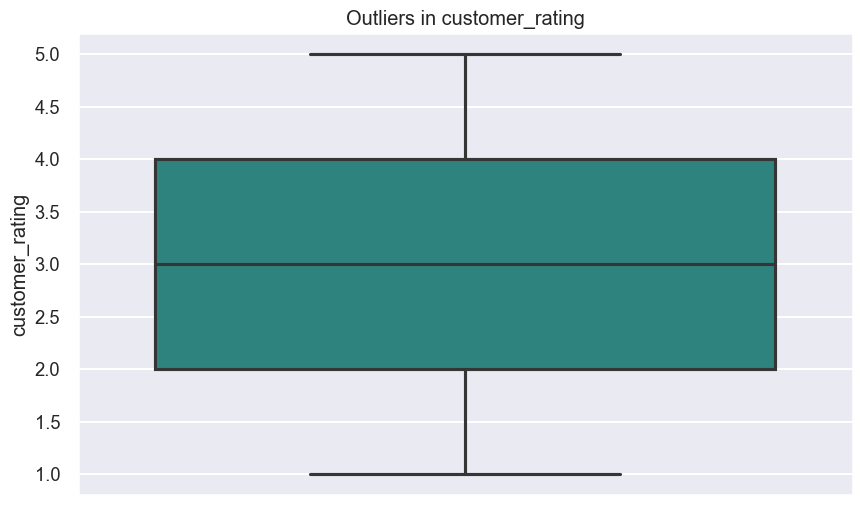

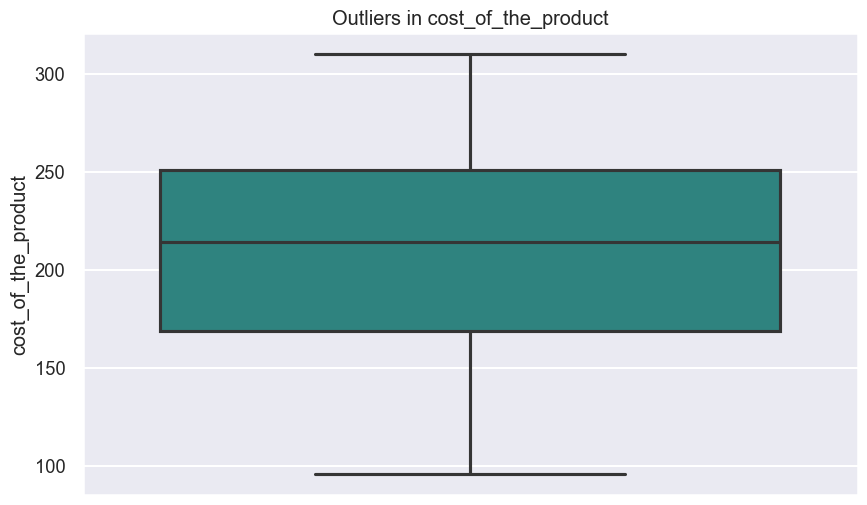

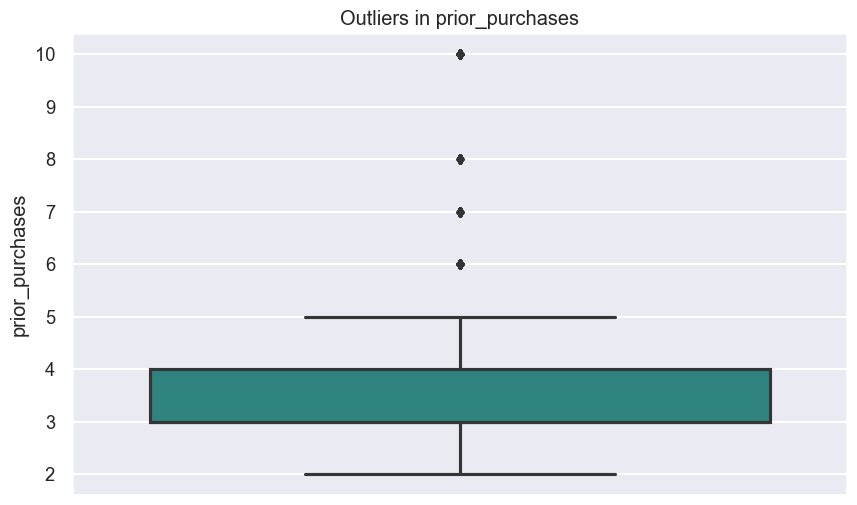

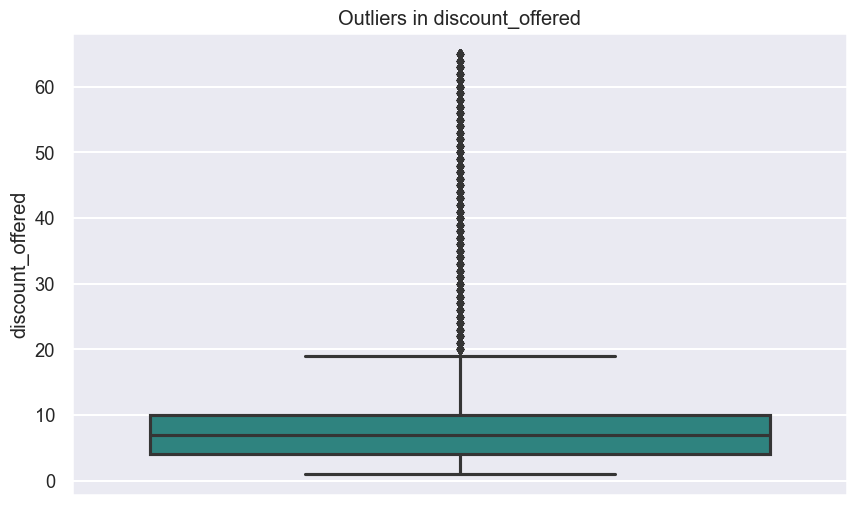

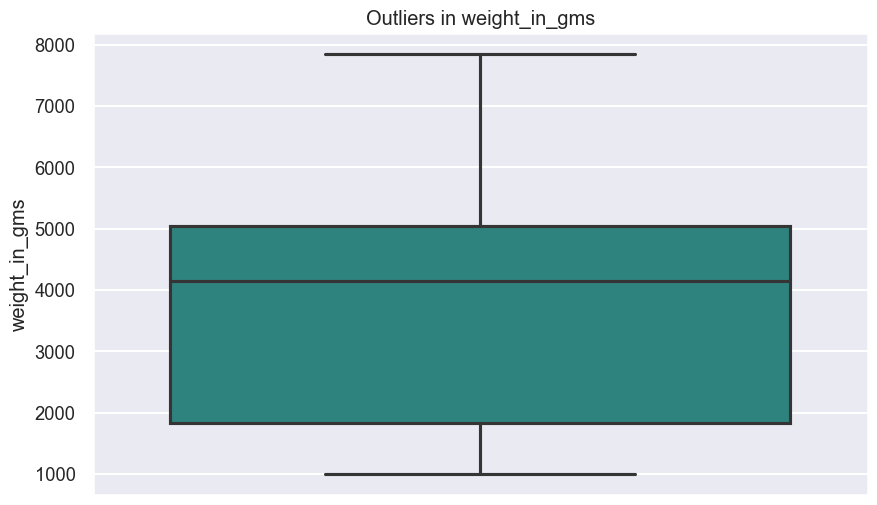

In [25]:
numerical_cols = df[['customer_care_calls','customer_rating', 'cost_of_the_product', 'prior_purchases','discount_offered', 'weight_in_gms']]
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=data[col], palette='viridis')
    plt.title(f'Outliers in {col}')
    plt.show()

In [35]:
# looking at the warehouse column and what are the categories present in it

warehouse = df['warehouse_block'].value_counts().reset_index()
warehouse.columns = ['warehouse', 'value_counts']
fig = px.pie(warehouse, names = 'warehouse', values = 'value_counts', 
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

> Dari analisa boxplot didapatkan bahwa terdapat outliers pada column discount_offered dan prior purchase, maka kedua hal ini harus dilakukan handling outliers, karena ada beberapa model yang sangat sensitive terhadap outliers.

## **5. Feature Engineering**
> Feature engineering adalah proses transformasi dan pembuatan fitur (variabel) baru untuk meningkatkan performa model machine learning. Ini adalah salah satu aspek kritis dalam pemodelan prediktif karena kualitas fitur yang digunakan seringkali lebih penting daripada kecanggihan model itu sendiri. Proses feature engineering mencakup pemahaman mendalam tentang data dan domain masalah. Pada proses ini akan dilakukan splitting data, scaling data, handling outliers, dan splitting data untuk data train dan test

*5.1. Checking Balancing Data*
> Berdasarkan hasil checking based on value counts, didapatkan bahwa data ini masih dikatakan balance.

In [26]:
# Calculate the value counts and the percentage of each unique value in the column 'reached.on.time_y.n'
value_counts = df['reached.on.time_y.n'].value_counts(normalize=True) * 100

# Display the percentages
value_counts_percentage = value_counts.to_string() + "%"
value_counts_percentage

'reached.on.time_y.n\n1    59.669061\n0    40.330939%'

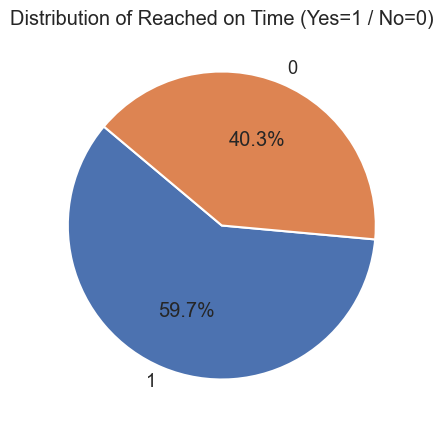

In [27]:
# Generate a pie chart for the distribution of 'Reached.on.Time_Y.N'
plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Reached on Time (Yes=1 / No=0)')
plt.show()

In [28]:
# 
df['reached.on.time_y.n'].value_counts()

reached.on.time_y.n
1    6563
0    4436
Name: count, dtype: int64

*5.2. Splitting Data*

In [29]:
X = df.drop(['reached.on.time_y.n'], axis = 1)
y = df['reached.on.time_y.n']
X.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms
0,D,Flight,4,2,177,3,low,F,44,1233
1,E,Flight,4,5,216,2,low,M,59,3088
2,A,Flight,2,2,183,4,low,M,48,3374
3,B,Flight,3,3,176,4,medium,M,10,1177
4,C,Flight,2,2,184,3,medium,F,46,2484


*5.3. Splitting Between Train and Test*

In [30]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)
print('X-train', X_train.shape)
print('X-Test', X_test.shape)

X-train (8799, 10)
X-Test (2200, 10)


In [31]:
X_train

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms
2240,A,Ship,3,3,168,3,medium,M,11,1008
4558,C,Ship,5,1,252,4,medium,M,4,1837
10791,B,Ship,4,2,259,5,medium,M,7,1042
4310,A,Ship,6,2,246,6,low,F,1,4846
5211,B,Flight,3,2,160,3,medium,M,3,5807
...,...,...,...,...,...,...,...,...,...,...
7526,A,Road,3,3,157,3,low,F,6,5187
6471,B,Ship,4,4,266,3,low,M,3,5531
2454,D,Road,4,5,219,2,medium,F,28,2164
9484,C,Ship,3,5,218,2,medium,F,6,4072


In [32]:
X_train.columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms'],
      dtype='object')

*5.3. Splitting Categorical Column and Numerical Column*

In [33]:
# Categorical Columns
cat_col = ['warehouse_block','mode_of_shipment','product_importance','gender']

# Numerical Columns
num_col = ['customer_care_calls','customer_rating', 'cost_of_the_product', 'prior_purchases','discount_offered', 'weight_in_gms']

***Handling Outliers***
> Pada proses ini akan dilakukan handling outliers pada columns 'prior_purchase' dan 'discount_offered'. Handling outliers/Extreme values ini akan mempengaruhi beberapa model yang akan digunakan dikarenakan ada beberapa model yang sensitive terhadap outliers seperti model KNN, SVM, dsb.
>
> Proses Handling Outliers ini akan dilakukan dengan menggunakan metode Winsorizer. Keunggulan metode Winsorizer ini adalah data yang melebihi atau lebih kurang dari kuartil tertinggi dan terendah, tidak akan dihapus/dihilangkan, melainkan akan dicapping terhadap nilai tertinggi dan terendah. Metode ini akan mengurangi jumlah outliers tanpa mengurangi data yang membuat proses analisa dan modeling akan lebih baik

- *Before Handling Outliers:*

In [34]:
print('Bafore Doing Winsorizer: ')
X_train[num_col].skew()

Bafore Doing Winsorizer: 


customer_care_calls    0.389524
customer_rating        0.005025
cost_of_the_product   -0.153765
prior_purchases        1.674824
discount_offered       1.806311
weight_in_gms         -0.245154
dtype: float64

In [35]:
# Initialize the Winsorizer for the subset of columns
windsoriser = Winsorizer(capping_method='iqr',
                          tail='both',
                          fold=1.5,
                          variables=['prior_purchases', 'discount_offered'])

# Fit the Winsorizer to the subset of columns
windsoriser.fit(X_train)

# Apply the transformation to the training data
X_train_winsorised = windsoriser.transform(X_train)

# Apply the transformation to the test data
X_test_winsorised = windsoriser.transform(X_test)

# If you want to replace the original data with the winsorised data, you can do so:
X_train = X_train_winsorised
X_test = X_test_winsorised

- *After Handling Outliers:*

In [36]:
print('After Doing Winsorizer: ')
X_train[num_col].skew()

After Doing Winsorizer: 


customer_care_calls    0.389524
customer_rating        0.005025
cost_of_the_product   -0.153765
prior_purchases        0.411550
discount_offered       0.710615
weight_in_gms         -0.245154
dtype: float64

In [37]:
X_train

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms
2240,A,Ship,3,3,168,3.0,medium,M,11,1008
4558,C,Ship,5,1,252,4.0,medium,M,4,1837
10791,B,Ship,4,2,259,5.0,medium,M,7,1042
4310,A,Ship,6,2,246,5.5,low,F,1,4846
5211,B,Flight,3,2,160,3.0,medium,M,3,5807
...,...,...,...,...,...,...,...,...,...,...
7526,A,Road,3,3,157,3.0,low,F,6,5187
6471,B,Ship,4,4,266,3.0,low,M,3,5531
2454,D,Road,4,5,219,2.0,medium,F,19,2164
9484,C,Ship,3,5,218,2.0,medium,F,6,4072


In [38]:
# from imblearn.over_sampling import SMOTENC


# smotenc = SMOTENC([0, 1, 6, 7], random_state = 42)
# X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train, y_train)
# y_train_balanced.value_counts()

***Feature Scalling***

- **Scalling Numerical Columns**

1. *Standard Scaler*

In [39]:
numerical_column = num_col

- **Encoding Categorical Columns**

1. *One Hot Encoding*

In [40]:
categorical_column_ohe = ['warehouse_block','mode_of_shipment','gender']

2. *Ordinal Encoding*

In [41]:
# Correct the ord_order to be a list of lists
ord_col = ['product_importance']  # Ordinal column
ord_order = [['low', 'medium', 'high']]  # Correct ordinal order

> Pada proses scaling ini, akan melakukan scalling dan ecoding, dimana feature scalling akan dilakukan pada seluruh numerical column dengan menggunakan standard scaller. hal ini karena standard scaler adalah sangat cocok dengan data yang memiliki distribusi normal maupun hampir yang mendekati distribusi normal. Dan dilakukan juga Encoding pada categorical column, dimana ada encoding akan dilakukan menggunakan One Hot Encoding dan Ordinal Encoding, karena masing-masing column memiliki sifat yang berbeda seperti urutan dan sebagainya.

***Preprocessing***

> Kegunaan preprocessing adalah untuk mendefine dan melakukan column tranformer, dimana pada preprosessor terdiri atas data-data feature scalling yang terdiri standard scaler untuk numerical column, dan menggunakan ordinal encoder, dan one hot encoder pada tiap kategorial column.

In [42]:
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_column),  # Asumsi numerical_columns adalah list dari nama kolom numerik
    (OrdinalEncoder(), ord_col),  # Gunakan instance OrdinalEncoder yang sudah dibuat
    (OneHotEncoder(), categorical_column_ohe),  # Asumsi categorical_columns_ohe adalah list dari nama kolom kategorikal untuk one-hot encoding
    remainder="passthrough"
)


## **6. Model Definition**

> Pada proses ini adalah dengan membuat pipeline berdasarkan dari hasil preprocessor dan 4 model, yang terdiri dari KNN, SVM, Decision Tree, dan Random Forest

- KNN

In [43]:
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier(n_jobs=-1))
# knn_pipeline.fit(X_train, y_train) -> masuknya ke model training

- SVM

In [44]:
svm_pipeline = make_pipeline(preprocessor, SVC(random_state=42))
# svm_pipeline.fit(X_train, y_train) -> masuknya ke model training

- Decision Tree

In [45]:
# # Membuat pipeline untuk Decision Tree
# decision_tree_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42))

decision_tree_pipeline = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(
        criterion='entropy',
        max_depth=3,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
)

- Random Forest

In [46]:
# # Membuat pipeline untuk Random Forest
# random_forest_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42, n_jobs=-1))

# Random Forest with custom parameters
random_forest_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1,
        random_state=42
    )
)

- Boosting

In [47]:
# Define your SVC classifier
svc = SVC(kernel='rbf', probability=True, random_state=42)
# Wrap the SVC classifier with AdaBoost
ada_clf = AdaBoostClassifier(
    base_estimator=svc,
    n_estimators=5,
    algorithm="SAMME.R",  # Use SAMME.R as the algorithm for AdaBoost with SVM
    random_state=42
)

## **7. Model Training**
> Proses ini akan melakukan fitting antara hasil pipeline dengan X_train dan y_train. Kegunaannya adalah untuk memasukan nilai X_train dan y_train pada tiap model pipeline.

- KNN Training pipeline

In [48]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['customer_care_calls',
                                                   'customer_rating',
                                                   'cost_of_the_product',
                                                   'prior_purchases',
                                                   'discount_offered',
                                                   'weight_in_gms']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['product_importance']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['warehouse_block',
                                                   'mode_of_shipment',
                                                   'gender'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_jobs=-1))])

- SVM Training pipeline

In [49]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['customer_care_calls',
                                                   'customer_rating',
                                                   'cost_of_the_product',
                                                   'prior_purchases',
                                                   'discount_offered',
                                                   'weight_in_gms']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['product_importance']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['warehouse_block',
                                                   'mode_of_shipment',
                                                   'gender'])])),
                ('svc', SVC(random_state=42))])

- Decision Tree Pipeline

In [50]:
decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['customer_care_calls',
                                                   'customer_rating',
                                                   'cost_of_the_product',
                                                   'prior_purchases',
                                                   'discount_offered',
                                                   'weight_in_gms']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['product_importance']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['warehouse_block',
                                                   'mode_of_shipment',
                                                   'gender'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=2, min_samples_split=5,
                                        random_state=42))])

- Random Forest Pipeline

In [51]:
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['customer_care_calls',
                                                   'customer_rating',
                                                   'cost_of_the_product',
                                                   'prior_purchases',
                                                   'discount_offered',
                                                   'weight_in_gms']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['product_importance']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['warehouse_block',
                                                   'mode_of_shipment',
                                                   'gender'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=2,
                                        min_samples_split=5, n_jobs=-1,
                                        random_state=42))])

- Boosting

In [52]:
# Create a pipeline that first preprocesses the data then applies AdaBoost with SVC
svm_ada_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ada_boost_svc', ada_clf)
])

# Fit the pipeline to your training data
svm_ada_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['customer_care_calls',
                                                   'customer_rating',
                                                   'cost_of_the_product',
                                                   'prior_purchases',
                                                   'discount_offered',
                                                   'weight_in_gms']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['product_importance']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['warehouse_block',
                                                   'mode_of_shipment',
                                                   'gender'])])),
                ('ada_boost_svc',
                 AdaBoostClassifier(base_estimator=SVC(probability=True,
                                                       random_state=42),
                                    n_estimators=5, random_state=42))])

## **8. Model Evaluation**

- KNN Baseline Model

F1 Score - Train Set  :  0.8096967317695554 

Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      3564
           1       0.83      0.79      0.81      5235

    accuracy                           0.78      8799
   macro avg       0.77      0.78      0.77      8799
weighted avg       0.78      0.78      0.78      8799
 

Confusion Matrix      : 
F1 Score - Test Set  :  0.6824534161490683 

Classification Report : 
               precision    recall  f1-score   support

           0       0.53      0.58      0.55       872
           1       0.70      0.66      0.68      1328

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200
 

Confusion Matrix      : 


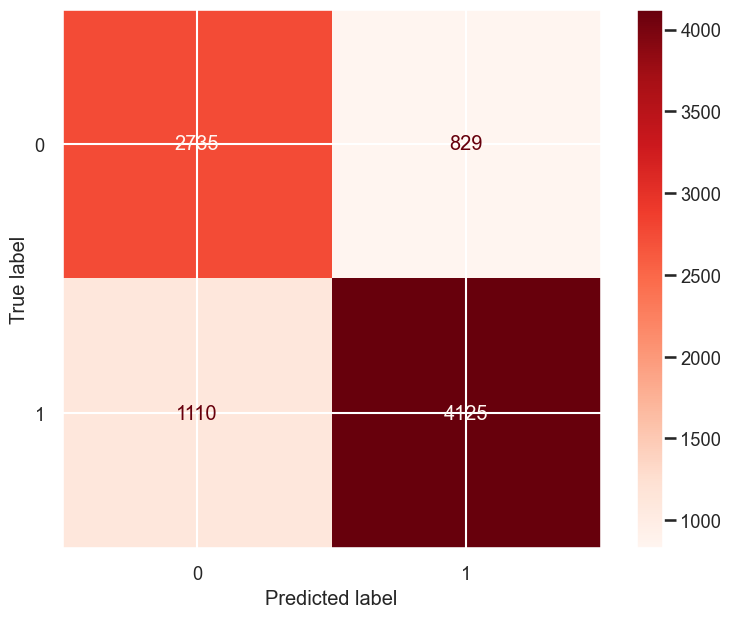

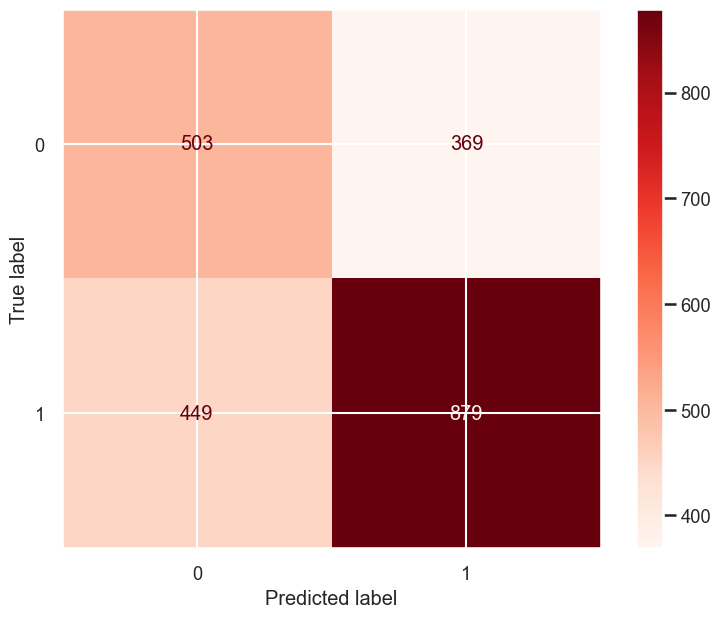

In [53]:
y_pred_train = knn_pipeline.predict(X_train)
y_pred_test = knn_pipeline.predict(X_test)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_pipeline, X_train, y_train, cmap='Reds'))

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_pipeline, X_test, y_test, cmap='Reds'))

- SVM Baseline Model

F1 Score - Train Set  :  0.6950788792088534 

Classification Report : 
               precision    recall  f1-score   support

           0       0.59      0.91      0.72      3564
           1       0.91      0.56      0.70      5235

    accuracy                           0.71      8799
   macro avg       0.75      0.74      0.71      8799
weighted avg       0.78      0.71      0.70      8799
 

Confusion Matrix      : 
F1 Score - Test Set  :  0.6543438077634011 

Classification Report : 
               precision    recall  f1-score   support

           0       0.55      0.85      0.67       872
           1       0.85      0.53      0.65      1328

    accuracy                           0.66      2200
   macro avg       0.70      0.69      0.66      2200
weighted avg       0.73      0.66      0.66      2200
 

Confusion Matrix      : 


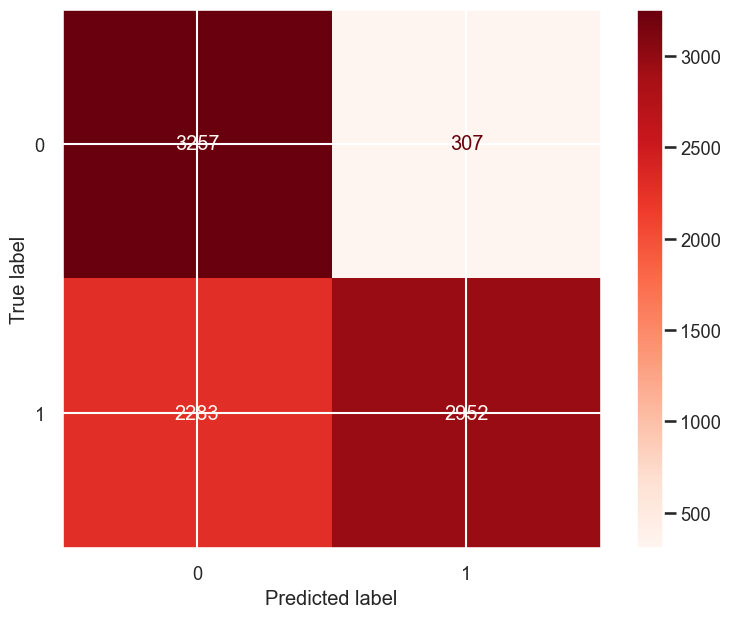

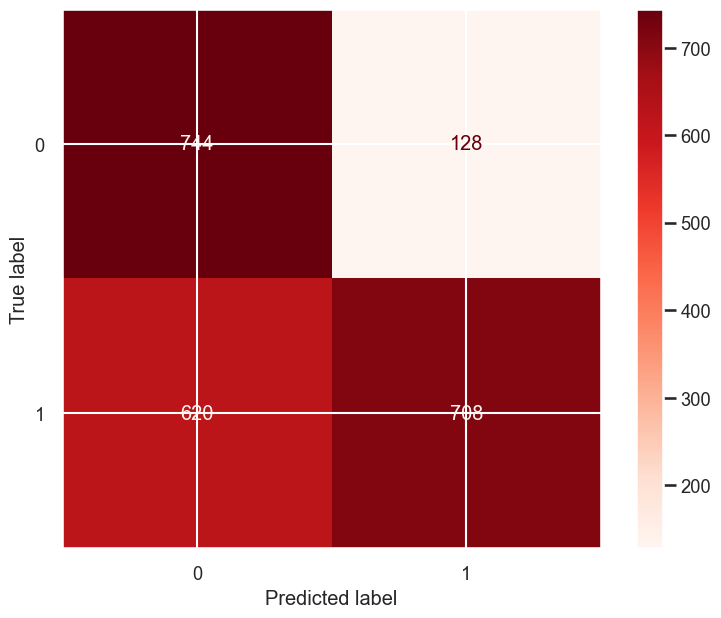

In [54]:
y_pred_train = svm_pipeline.predict(X_train)
y_pred_test = svm_pipeline.predict(X_test)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_pipeline, X_train, y_train, cmap='Reds'))

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_pipeline, X_test, y_test, cmap='Reds'))

- Decision Tree Baseline Model

F1 Score - Train Set  :  0.6417098773238902 

Classification Report : 
               precision    recall  f1-score   support

           0       0.56      0.96      0.71      3564
           1       0.95      0.48      0.64      5235

    accuracy                           0.68      8799
   macro avg       0.75      0.72      0.67      8799
weighted avg       0.79      0.68      0.67      8799
 

Confusion Matrix      : 
F1 Score - Test Set  :  0.6427145708582834 

Classification Report : 
               precision    recall  f1-score   support

           0       0.55      0.96      0.70       872
           1       0.95      0.48      0.64      1328

    accuracy                           0.67      2200
   macro avg       0.75      0.72      0.67      2200
weighted avg       0.79      0.67      0.67      2200
 

Confusion Matrix      : 


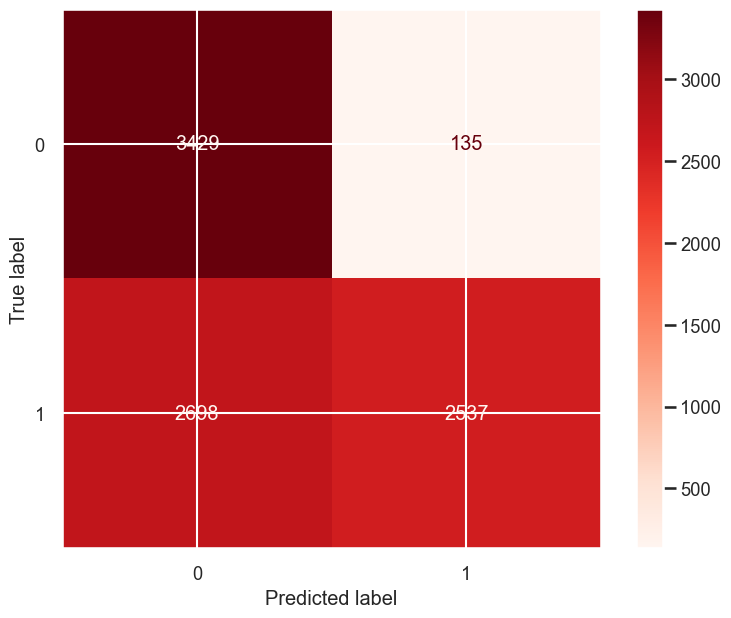

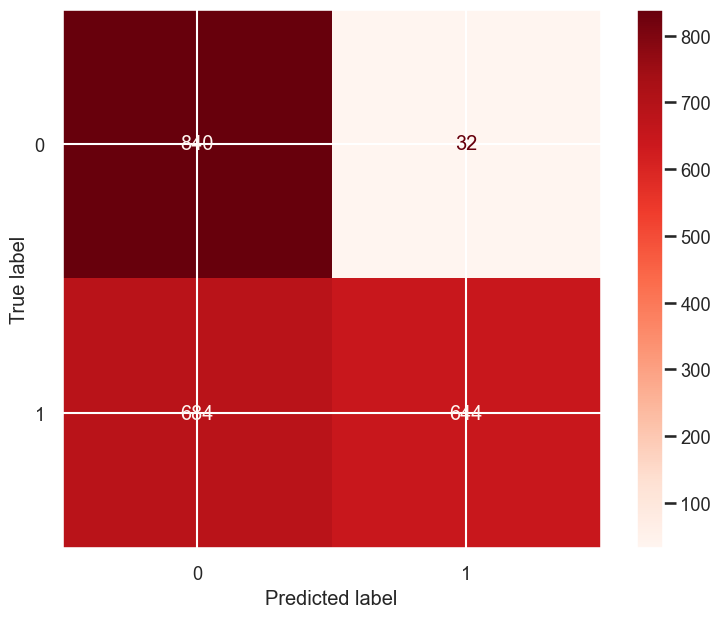

In [55]:
y_pred_train = decision_tree_pipeline.predict(X_train)
y_pred_test = decision_tree_pipeline.predict(X_test)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(decision_tree_pipeline, X_train, y_train, cmap='Reds'))

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(decision_tree_pipeline, X_test, y_test, cmap='Reds'))

- Random Forest Baseline Model

F1 Score - Train Set  :  0.6950028719126938 

Classification Report : 
               precision    recall  f1-score   support

           0       0.59      0.88      0.70      3564
           1       0.87      0.58      0.70      5235

    accuracy                           0.70      8799
   macro avg       0.73      0.73      0.70      8799
weighted avg       0.76      0.70      0.70      8799
 

Confusion Matrix      : 
F1 Score - Test Set  :  0.6794171220400728 

Classification Report : 
               precision    recall  f1-score   support

           0       0.56      0.86      0.68       872
           1       0.86      0.56      0.68      1328

    accuracy                           0.68      2200
   macro avg       0.71      0.71      0.68      2200
weighted avg       0.74      0.68      0.68      2200
 

Confusion Matrix      : 


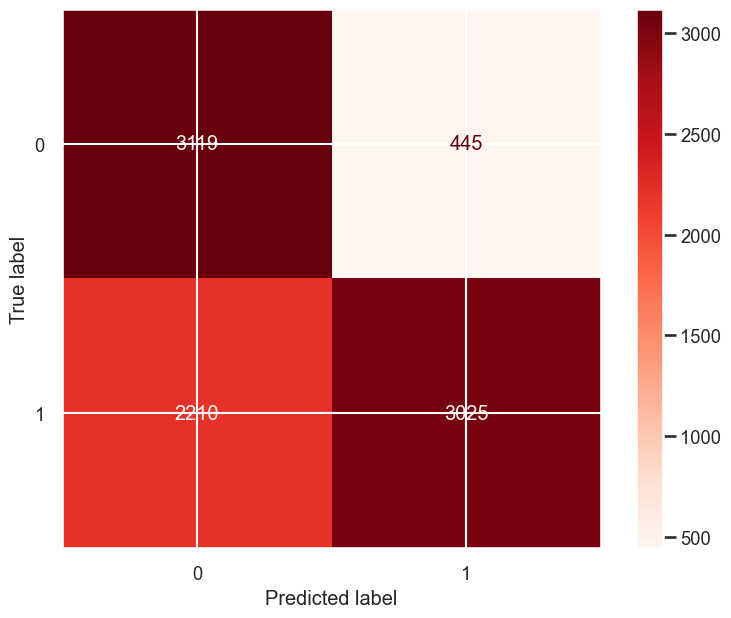

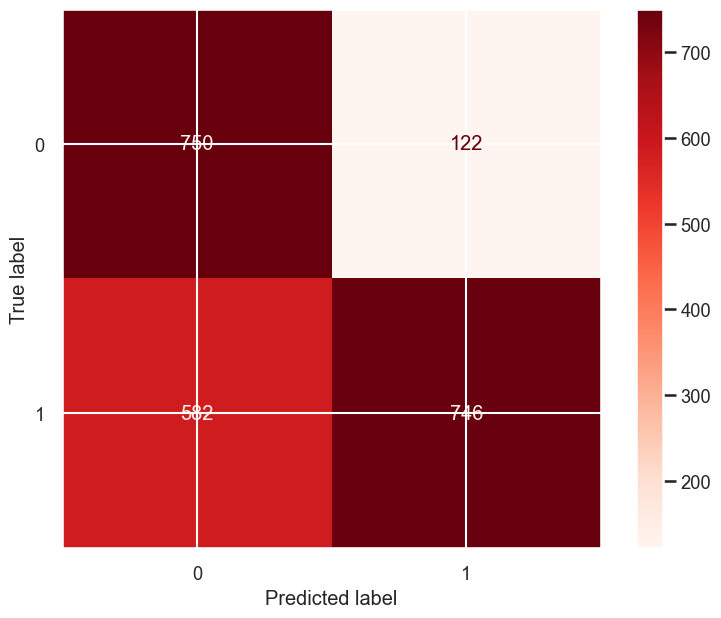

In [56]:
y_pred_train = random_forest_pipeline.predict(X_train)
y_pred_test = random_forest_pipeline.predict(X_test)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(random_forest_pipeline, X_train, y_train, cmap='Reds'))

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(random_forest_pipeline, X_test, y_test, cmap='Reds'))

- Boosting Model

In [57]:
# Model Evaluation

y_train_pred = svm_ada_pipeline.predict(X_train)
y_test_pred = svm_ada_pipeline.predict(X_test)

print('Precision - Train - AdaBoost : ', precision_score(y_train, y_train_pred, average='weighted'))
print('Precision - Test - AdaBoost  : ', precision_score(y_test, y_test_pred, average='weighted'))

Precision - Train - AdaBoost :  0.6218858892359387
Precision - Test - AdaBoost  :  0.6198723640928502


> Berdasarkan dari confusion matrix, target adalah shipping on time atau tidak. Untuk 1 adalah ontime, dan 0 adalah tidak. 
> 1. False Positive = Barang diprediksi on time, tetapi faktanya tidak on time
> 2. False Negative = Barang diprediksi tidak on time, tetapi faktanya on time
>
> Jika melihat dari segi kepuasan pelanggan/customer, service level agreement, ataupun penalty, False Positive (Barang diprediksi on time, tetapi faktanya tidak on time) Lebih berbahaya. Karena jika customer membeli suatu barang, dimana barang akan diprediksi datang secara on time, tetapi ternyata secara fakta bahwa barang tidak datang on time, itu akan membuat customer hilang rasa kepercayaan terhadap perusahaan. Hal ini akan memiliki effect juga terhadap satisfaction pelanggan, dan juga loss of business. Karena salah satu hal yang paling penting adalah kepercayaan dan kepuasan customer. Maka yang paling berbahaya adalah "False Positive"
>
> Bedasarkan dari hasil ke 4 model, didapatkan bahwa nilai Precision (false positive) pada 1 (on time) adalah :
>
>| No | Model | Train | Test |
>| --- | --- | --- | --- |
>| 1 | KNN | 0.83 | 0.70 |
>| 2 | SVM | 0.91 | 0.85 |
>| 3 | Decision Tree | 0.95 | 0.95 |
>| 4 | Random Forest | 0.87 | 0.86 |
>| 5 | Boosting | 0.62 | 0.61 |
>
> Jika dilihat dari model ini, KNN dan SVM memiliki nilai train test overfitting. Tetapi pada model Decision Tree dan Random Forest memiliki nilai Train-Test yang sama. untuk memastikan apakah model ini memang yang terbaik, maka perlu dilakukan Cross Validation.
>
> Secara flow pengerjaan, maka hal pertama yang akan dilakukan adalah dengan melihat Cross Validation menggunakan fungsi *cross_val_score*. Hal ini berguna untuk melihat range train - test yang sebenarnya dari coss_val_score. Selanjutnya akan dilakukan hyperparameter tuning untuk dengan menggunakan grid search guna mendapatkan parameter-parameter model terbaik. Dan selanjutnya akan dilakukan cross validation lagi untuk tiap model setelah dilakukan hyperparameter tuning.


***Cross Validation***

- KNN Cross Validation

*1. Train*

In [58]:
precision_train_cross_val_knn = cross_val_score(knn_pipeline,
                                         X_train,
                                         y_train,  # Make sure to use y_train here
                                         cv=3,
                                         scoring="precision")

# Print the precision scores and statistics
print('precision Score - All - Cross Validation  : ', precision_train_cross_val_knn)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_knn.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_knn.std())
print('precision Score - Range of Train-Set       : ', (precision_train_cross_val_knn.mean() - precision_train_cross_val_knn.std()), '-', (precision_train_cross_val_knn.mean() + precision_train_cross_val_knn.std()))

precision Score - All - Cross Validation  :  [0.71489621 0.715874   0.71588089]
precision Score - Mean - Cross Validation :  0.7155503681634906
precision Score - Std - Cross Validation  :  0.00046256478104104743
precision Score - Range of Train-Set       :  0.7150878033824496 - 0.7160129329445316


*2. Test*

In [59]:
precision_test_cross_val_knn = cross_val_score(knn_pipeline,
                                         X_test,
                                         y_test,  # Make sure to use y_test here
                                         cv=3,
                                         scoring="precision")

# Print the precision scores and statistics
print('precision Score - All - Cross Validation  : ', precision_test_cross_val_knn)
print('precision Score - Mean - Cross Validation : ', precision_test_cross_val_knn.mean())
print('precision Score - Std - Cross Validation  : ', precision_test_cross_val_knn.std())
print('precision Score - Range of test-Set       : ', (precision_test_cross_val_knn.mean() - precision_test_cross_val_knn.std()), '-', (precision_test_cross_val_knn.mean() + precision_test_cross_val_knn.std()))

precision Score - All - Cross Validation  :  [0.70238095 0.69863014 0.69300226]
precision Score - Mean - Cross Validation :  0.698004448901199
precision Score - Std - Cross Validation  :  0.0038543131138871465
precision Score - Range of test-Set       :  0.6941501357873118 - 0.7018587620150861


- SVM Cross Validation

*1. Train*

In [60]:
precision_train_cross_val_svm = cross_val_score(svm_pipeline,
                                         X_train,
                                         y_train,  # Make sure to use y_train here
                                         cv=3,
                                         scoring="precision")

# Print the precision scores and statistics
print('precision Score - All - Cross Validation  : ', precision_train_cross_val_svm)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_svm.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_svm.std())
print('precision Score - Range of Train-Set       : ', (precision_train_cross_val_svm.mean() - precision_train_cross_val_svm.std()), '-', (precision_train_cross_val_svm.mean() + precision_train_cross_val_svm.std()))

precision Score - All - Cross Validation  :  [0.82962329 0.78438949 0.85914179]
precision Score - Mean - Cross Validation :  0.8243848562232138
precision Score - Std - Cross Validation  :  0.030741475811807962
precision Score - Range of Train-Set       :  0.7936433804114058 - 0.8551263320350218


*2. Test*

In [61]:
precision_test_cross_val_svm = cross_val_score(svm_pipeline,
                                         X_test,
                                         y_test,  # Make sure to use y_test here
                                         cv=3,
                                         scoring="precision")

# Print the precision scores and statistics
print('precision Score - All - Cross Validation  : ', precision_test_cross_val_svm)
print('precision Score - Mean - Cross Validation : ', precision_test_cross_val_svm.mean())
print('precision Score - Std - Cross Validation  : ', precision_test_cross_val_svm.std())
print('precision Score - Range of test-Set       : ', (precision_test_cross_val_svm.mean() - precision_test_cross_val_svm.std()), '-', (precision_test_cross_val_svm.mean() + precision_test_cross_val_svm.std()))

precision Score - All - Cross Validation  :  [0.73994638 0.74424552 0.7493188 ]
precision Score - Mean - Cross Validation :  0.7445035686945481
precision Score - Std - Cross Validation  :  0.0038306227682204695
precision Score - Range of test-Set       :  0.7406729459263277 - 0.7483341914627686


- Decision Tree Cross Validation

*1. Train*

In [62]:
precision_train_cross_val_decision_tree = cross_val_score(decision_tree_pipeline,
                                         X_train,
                                         y_train,  # Make sure to use y_train here
                                         cv=3,
                                         scoring="precision")

# Print the precision scores and statistics
print('precision Score - All - Cross Validation  : ', precision_train_cross_val_decision_tree)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_decision_tree.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_decision_tree.std())
print('precision Score - Range of Train-Set       : ', (precision_train_cross_val_decision_tree.mean() - precision_train_cross_val_decision_tree.std()), '-', (precision_train_cross_val_decision_tree.mean() + precision_train_cross_val_decision_tree.std()))

precision Score - All - Cross Validation  :  [0.94194962 0.97596154 0.97482014]
precision Score - Mean - Cross Validation :  0.9642437663316142
precision Score - Std - Cross Validation  :  0.01577122967025023
precision Score - Range of Train-Set       :  0.948472536661364 - 0.9800149960018645


*2. Test*

In [63]:
precision_test_cross_val_decision_tree = cross_val_score(decision_tree_pipeline,
                                         X_test,
                                         y_test,  # Make sure to use y_test here
                                         cv=3,
                                         scoring="precision")

# Print the precision scores and statistics
print('precision Score - All - Cross Validation  : ', precision_test_cross_val_decision_tree)
print('precision Score - Mean - Cross Validation : ', precision_test_cross_val_decision_tree.mean())
print('precision Score - Std - Cross Validation  : ', precision_test_cross_val_decision_tree.std())
print('precision Score - Range of test-Set       : ', (precision_test_cross_val_decision_tree.mean() - precision_test_cross_val_decision_tree.std()), '-', (precision_test_cross_val_decision_tree.mean() + precision_test_cross_val_decision_tree.std()))

precision Score - All - Cross Validation  :  [0.6627907  0.97487437 0.96017699]
precision Score - Mean - Cross Validation :  0.8659473535613857
precision Score - Std - Cross Validation  :  0.1437787035071768
precision Score - Range of test-Set       :  0.7221686500542089 - 1.0097260570685624


- Random Forest Cross Validation

*1. Train*

In [64]:
precision_train_cross_val_random_forest = cross_val_score(random_forest_pipeline,
                                         X_train,
                                         y_train,  # Make sure to use y_train here
                                         cv=3,
                                         scoring="precision")

# Print the precision scores and statistics
print('precision Score - All - Cross Validation  : ', precision_train_cross_val_random_forest)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_random_forest.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_random_forest.std())
print('precision Score - Range of Train-Set       : ', (precision_train_cross_val_random_forest.mean() - precision_train_cross_val_random_forest.std()), '-', (precision_train_cross_val_random_forest.mean() + precision_train_cross_val_random_forest.std()))

precision Score - All - Cross Validation  :  [0.82643958 0.79418345 0.85636856]
precision Score - Mean - Cross Validation :  0.825663862380063
precision Score - Std - Cross Validation  :  0.025392893256764245
precision Score - Range of Train-Set       :  0.8002709691232988 - 0.8510567556368271


*2. Test*

In [65]:
precision_test_cross_val_random_forest = cross_val_score(random_forest_pipeline,
                                         X_test,
                                         y_test,  # Make sure to use y_test here
                                         cv=3,
                                         scoring="precision")

# Print the precision scores and statistics
print('precision Score - All - Cross Validation  : ', precision_test_cross_val_random_forest)
print('precision Score - Mean - Cross Validation : ', precision_test_cross_val_random_forest.mean())
print('precision Score - Std - Cross Validation  : ', precision_test_cross_val_random_forest.std())
print('precision Score - Range of test-Set       : ', (precision_test_cross_val_random_forest.mean() - precision_test_cross_val_random_forest.std()), '-', (precision_test_cross_val_random_forest.mean() + precision_test_cross_val_random_forest.std()))

precision Score - All - Cross Validation  :  [0.76584022 0.77188329 0.74324324]
precision Score - Mean - Cross Validation :  0.7603222509178623
precision Score - Std - Cross Validation  :  0.012326098255553012
precision Score - Range of test-Set       :  0.7479961526623093 - 0.7726483491734153


> Bedasarkan dari hasil ke 4 model setelah dilakukan Cross Validation, didapatkan bahwa nilai Precision (false positive) pada 1 (on time) adalah :
>
>| No | Model | Train | Test | Type |
>| --- | --- | --- | --- | --- |
>| 1 | KNN | 0.71 | 0.70 | Good Fitting |
>| 2 | SVM | 0.79 - 0.85 | 0.74 | Slightly Overfitting |
>| 3 | Decision Tree | 0.95 - 0.98 | 0.72 - 1 | Overfitting |
>| 4 | Random Forest | 0.80 - 0.85 | 0.74 - 0.77 | Overfitting |
>
> Maka selanjutnya model yang akan digunakan adalah KNN, dan akan dilakukan hyperparameter tuning untuk melihat apakah hasilnya akan lebih baik lagi setelah di hyperparameter tuning atau tidak, jika ternyata hasil hyperparameter tuning untuk model KNN/SVM ternyata lebih buruk, maka untuk modeling KNN/SVM akan menggunakan default/baseline model

***Hyperparameter Tuning***
> Hyperparameter tuning adalah proses memilih set parameter ideal untuk model pembelajaran mesin. Tujuannya adalah untuk menemukan kombinasi hyperparameter yang memberikan hasil terbaik dari model, berdasarkan metrik performa seperti akurasi, precision, atau recall. Proses ini penting karena hyperparameter secara langsung mengontrol perilaku model pembelajaran mesin dan bisa memiliki dampak besar pada kualitas prediksi yang dihasilkan. Hyperparameter tuning bisa dilakukan secara manual, menggunakan grid search, random search, atau dengan metode otomatis seperti Bayesian optimization.

- KNN

In [66]:
# Parameter grid for KNN
n_neighbors_list = list(range(1, 31))
knn_grid_search_params = {
    'kneighborsclassifier__n_neighbors': n_neighbors_list,
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan']
}

# Setup the grid search
knn_grid_search = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_grid_search_params,
    scoring='precision',  # or 'f1', 'precision', 'recall', etc.
    cv=50,
    n_jobs=-1
)


In [67]:
# Fit the grid search to the data
knn_grid_search.fit(X_train, y_train)  # Uncomment and use the correct feature and target variables

GridSearchCV(cv=50,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['customer_care_calls',
                                                                          'customer_rating',
                                                                          'cost_of_the_product',
                                                                          'prior_purchases',
                                                                          'discount_offered',
                                                                          'weight_in_gms']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['product_importance']),
                                                                        ('onehotencoder'...
                                                                          'mode_of_shipment',
                                                                          'gender'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__metric': ['euclidean',
                                                          'manhattan'],
                         'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25, 26, 27,
                                                               28, 29, 30],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='precision')

In [68]:
# Get Best Hyperparameters

knn_grid_search.best_params_

{'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [69]:
# Get Best Estimator

knn_grid_best = knn_grid_search.best_estimator_

Precision Score - train Set   :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       0.69      1.00      0.81      3564
           1       1.00      0.69      0.82      5235

    accuracy                           0.81      8799
   macro avg       0.84      0.84      0.81      8799
weighted avg       0.87      0.81      0.81      8799
 

Confusion Matrix      : 
Precision Score - Test Set   :  0.8119369369369369 

Classification Report : 
               precision    recall  f1-score   support

           0       0.54      0.81      0.65       872
           1       0.81      0.54      0.65      1328

    accuracy                           0.65      2200
   macro avg       0.67      0.68      0.65      2200
weighted avg       0.70      0.65      0.65      2200
 

Confusion Matrix      : 


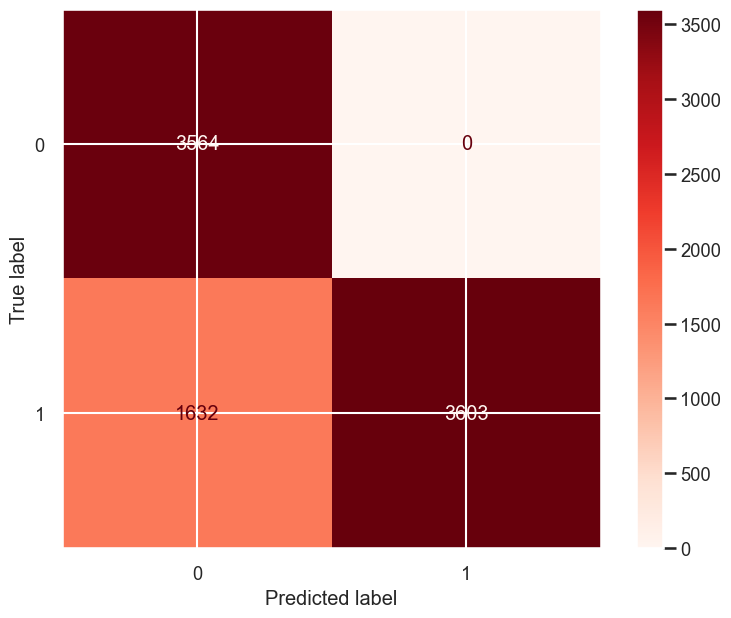

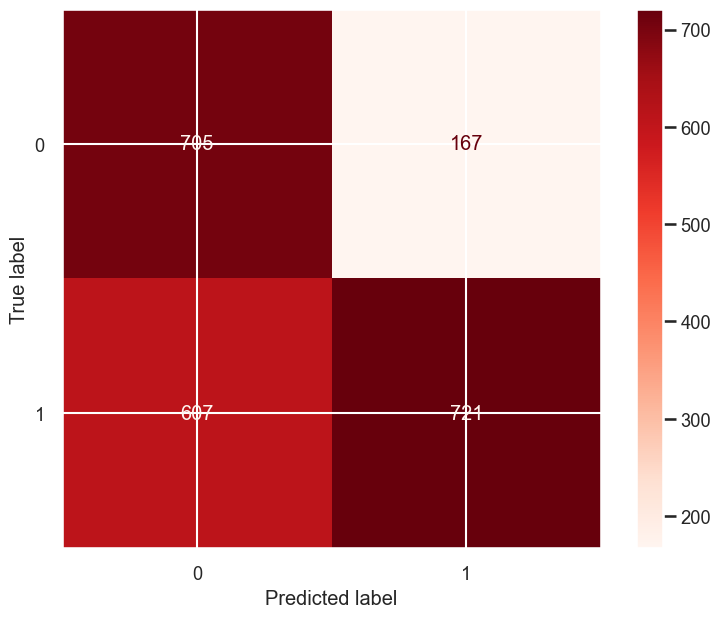

In [70]:
# Check Performance Model against Test-Set
y_pred_train = knn_grid_best.predict(X_train)
y_pred_test = knn_grid_best.predict(X_test)

print('Precision Score - train Set   : ', precision_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_grid_best, X_train, y_train, cmap='Reds'))

print('Precision Score - Test Set   : ', precision_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_grid_best, X_test, y_test, cmap='Reds'))

- SVM

In [71]:
# Parameter grid for SVM
svm_grid_search_params = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

In [72]:
# Setup the grid search for SVM
svm_grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_grid_search_params,
    scoring='precision',  # Choose an appropriate scoring metric for your problem
    cv=5,  # 5-fold cross-validation is a common choice
    n_jobs=-1,
    verbose=1  # This will print out more information during the grid search
)

In [73]:
# Fit the grid search to the data
svm_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['customer_care_calls',
                                                                          'customer_rating',
                                                                          'cost_of_the_product',
                                                                          'prior_purchases',
                                                                          'discount_offered',
                                                                          'weight_in_gms']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['product_importance']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['warehouse_block',
                                                                          'mode_of_shipment',
                                                                          'gender'])])),
                                       ('svc', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='precision', verbose=1)

In [74]:
# Display Best Hyperparamters from Random Search

svm_grid_search.best_params_

{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

In [75]:
# Get Best Estimator

svm_gridcv_best = svm_grid_search.best_estimator_
svm_gridcv_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['customer_care_calls',
                                                   'customer_rating',
                                                   'cost_of_the_product',
                                                   'prior_purchases',
                                                   'discount_offered',
                                                   'weight_in_gms']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['product_importance']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['warehouse_block',
                                                   'mode_of_shipment',
                                                   'gender'])])),
                ('svc', SVC(C=0.1, random_state=42))])

Precision Score - train Set   :  0.9128065395095368 

Classification Report : 
               precision    recall  f1-score   support

           0       0.56      0.93      0.70      3564
           1       0.91      0.51      0.66      5235

    accuracy                           0.68      8799
   macro avg       0.74      0.72      0.68      8799
weighted avg       0.77      0.68      0.67      8799
 

Confusion Matrix      : 
Precision Score - Test Set   :  0.8838451268357811 

Classification Report : 
               precision    recall  f1-score   support

           0       0.54      0.90      0.68       872
           1       0.88      0.50      0.64      1328

    accuracy                           0.66      2200
   macro avg       0.71      0.70      0.66      2200
weighted avg       0.75      0.66      0.65      2200
 

Confusion Matrix      : 


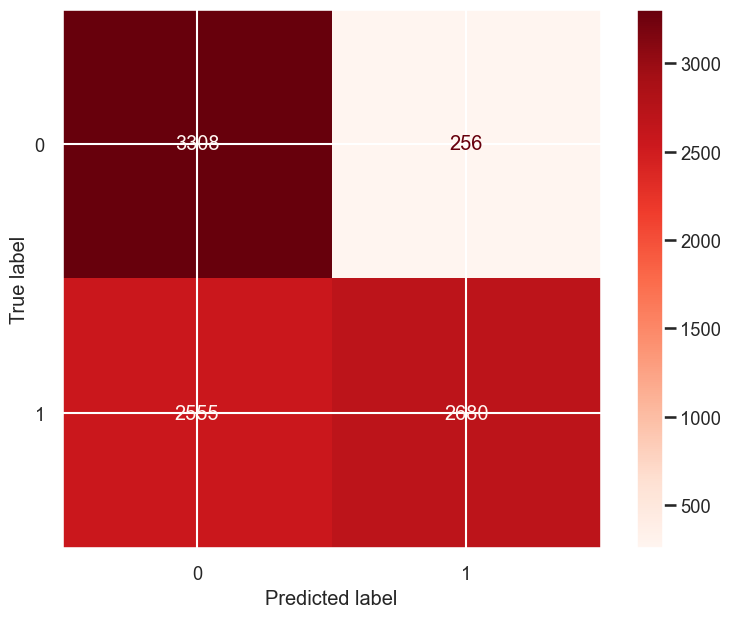

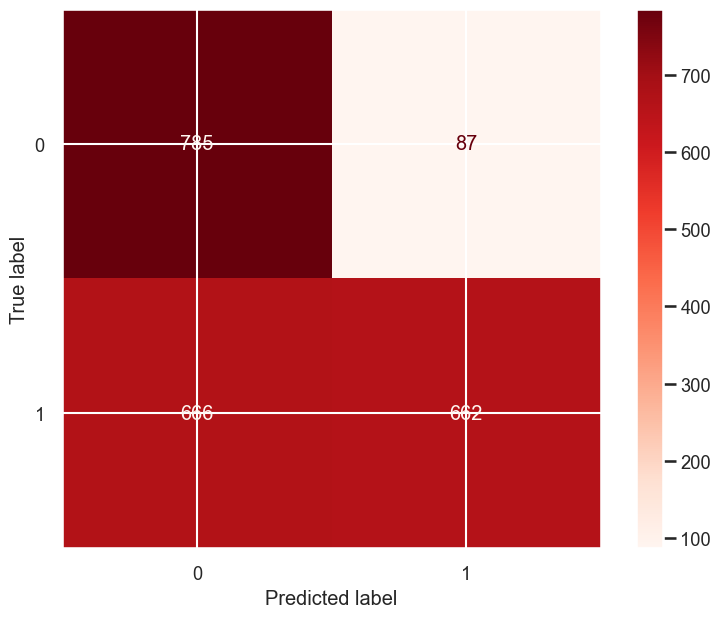

In [76]:
# # Check Performance Model against Test-Set
y_pred_train = svm_gridcv_best.predict(X_train)
y_pred_test = svm_gridcv_best.predict(X_test)

print('Precision Score - train Set   : ', precision_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_gridcv_best, X_train, y_train, cmap='Reds'))

print('Precision Score - Test Set   : ', precision_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_gridcv_best, X_test, y_test, cmap='Reds'))

> Berdasarkan dari hasil hyperparameter tuning yang menggunakan model terbaik dari hasil cross validation didapatkan bahwa model terbaik yaitu SVM model. Maka pada proses hyperparameter tuning didapatkan bahwa nilai Train pada model ini setelah hyperparameter tuning adalah 0.91 dan nilai Test sebesar 0.88

## **9. Model Saving**

In [77]:
with open('model.pkl', 'wb') as file_1:
  pickle.dump(svm_gridcv_best, file_1)

## **10. Model Inference**

**Dilanjutkan ke file : 'model_inference_devin_lee.ipynb'**

## **11. Pengambilan Kesimpulan**
> Dataset ini membahas tentang E-Commerce Shipping Data. Dimana data ini membahas tentang bagaimana proses pegiriman data yang berbeda-beda, dimana ada jalur darat, jalur laut, dan jalur udara. Dari ketiga hal ini akan dilihat juga bagaimana rating dari tiap-tiap proses jalur, dan tujuan utama pembuatan model ini adalah untuk mengetahui apakah dari parameter-parameter column ini, pengiriman on time atau tidak. 
>
> Dari analis data ini, didapatkan bahwa:
> - Didapatkan bahwa pada saat melalakukan pengecheckan nilai skewness, column prior_purchases dan discount_offered didapatkan bahwa nilai skewness pada column tersebut mengalami skew, hal ini kemungkinan dikarenakan terdapat outliers pada kedua columns tersebut. Maka perlu dilakukan handling outliers. Pada kasus ini jika tidak ingin menghilangkan data, maka handling outliers yang paling cocok adalah dengan menggunakan winsorizer yang nanti akan dilakukan di proses selanjutnya.
>
> - Berdasarkan dari hasil visualisasi didapatkan bahwa ada keterdapatan outliers pada beberapa column tertentu, dan dilakukan handling outliers menggunakan winsorizer
>
> - Berdasarkan dari analisa model, dari baseline model, hyperparameter tuning, dan boosting, didapatkan bahwa model terbaik adalah menggunakan model SVM. Dan berdasarkan hal ini, pemodelan untuk membuat suatu prediksi shipping on time atau tidak, akan menggunakan model SVM

**Conceptual Problems**
> 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging ! 
>
> Jawab: Bagging, atau Bootstrap Aggregating, merupakan metode ensemble learning yang dirancang untuk meningkatkan stabilitas dan akurasi dari algoritma machine learning yang digunakan pada klasifikasi dan regresi. Metode ini mengurangi varians dan membantu mencegah overfitting. Bagging bekerja dengan membuat multiple versi dari predictor (model pembelajaran mesin) dengan melatihnya secara terpisah pada subset data yang berbeda. Subset ini dibuat dengan proses sampling dengan penggantian dari dataset asli, yang dikenal sebagai bootstrap sample. Kemudian, prediksi dari masing-masing model diagregasikan melalui voting untuk klasifikasi atau rata-rata untuk regresi untuk membentuk prediksi final.
>
> 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !  
>
> Jawab:Random Forest adalah algoritma bagging yang menggunakan decision tree dimana setiap decision tree dilatih pada subset data yang secara acak dipilih dengan penggantian. Dalam klasifikasi, mode dari kelas output oleh decision tree individu adalah kelas yang diprediksi oleh ensemble. Dalam regresi, rata-rata prediksi dari decision tree individu diambil. Sebaliknya, algoritma boosting, seperti AdaBoost atau Gradient Boosting, bekerja secara iteratif dengan menambahkan model baru yang berusaha memperbaiki kesalahan dari model sebelumnya. Model baru ini memberikan bobot yang lebih tinggi pada contoh yang salah diklasifikasikan atau residual, sehingga algoritma secara berurutan fokus pada aspek paling sulit dari masalah pelatihan.
>
> 3. Jelaskan apa yang dimaksud dengan Cross Validation !  
>
> Jawab:teknik statistik yang digunakan untuk mengevaluasi kemampuan generalisasi dari suatu model, dan juga untuk melindungi terhadap overfitting. Teknik ini melibatkan pembagian dataset menjadi dua segmen: satu digunakan untuk melatih model dan yang lain digunakan untuk menguji model. Dalam k-fold cross-validation, data dibagi menjadi k subset yang disebut 'folds'. Model dilatih pada k-1 fold dan diuji pada fold yang tersisa. Proses ini diulangi k kali, dengan setiap fold digunakan tepat satu kali sebagai data uji. Hasilnya adalah k estimasi kinerja model, yang biasanya dirangkum dalam bentuk rata-rata.
